# test code

In [1]:
import os
import glob
import xarray as xr
import gsw

temp_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP'
salt_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT'
dens_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/DENS2'

In [6]:
# Function to calculate dens2
def calculate_dens2(temp_file, salt_file):
    ds_temp = xr.open_dataset(temp_file)
    ds_salt = xr.open_dataset(salt_file)
    
    CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
    sigma2 = gsw.density.sigma2(ds_salt['SALT'], CT)
    sigma2 = sigma2.rename('SIGMA_2')
    
    ds_temp.close()
    ds_salt.close()
    
    return sigma2

In [3]:
# Get list of TEMP and SALT files
temp_files = sorted(glob.glob(os.path.join(temp_dir, '*.nc')))
salt_files = sorted(glob.glob(os.path.join(salt_dir, '*.nc')))


In [8]:
# Loop through the files and process them

count = 0
for temp_file, salt_file in zip(temp_files, salt_files):
    
    # Extract the base filename to use for the output file
    temp_filename = os.path.basename(temp_file)
    dens_filename = temp_filename.replace('TEMP', 'DENS2')
        
    try:

        #print(dens_filename)
        
        # Calculate dens2
        #dens2_data = calculate_dens2(temp_file, salt_file)
        
        # Save the result to the output directory
        #output_file = os.path.join(dens_dir, dens_filename)
        
        #print(output_file)
        #dens2_data.to_netcdf(output_file)
        
        print(f'{dens_filename[25:]}  -  complete')
        
        count +=1

    except Exception as e:
        print(f'Error processing {dens_filename}')


LE2-1001.001.pop.h.DENS2.185001-185912.nc  -  complete
LE2-1001.001.pop.h.DENS2.186001-186912.nc  -  complete
LE2-1001.001.pop.h.DENS2.187001-187912.nc  -  complete
LE2-1001.001.pop.h.DENS2.188001-188912.nc  -  complete
LE2-1001.001.pop.h.DENS2.189001-189912.nc  -  complete
LE2-1001.001.pop.h.DENS2.190001-190912.nc  -  complete
LE2-1001.001.pop.h.DENS2.191001-191912.nc  -  complete
LE2-1001.001.pop.h.DENS2.192001-192912.nc  -  complete
LE2-1001.001.pop.h.DENS2.193001-193912.nc  -  complete
LE2-1001.001.pop.h.DENS2.194001-194912.nc  -  complete
LE2-1001.001.pop.h.DENS2.195001-195912.nc  -  complete
LE2-1001.001.pop.h.DENS2.196001-196912.nc  -  complete
LE2-1001.001.pop.h.DENS2.197001-197912.nc  -  complete
LE2-1001.001.pop.h.DENS2.198001-198912.nc  -  complete
LE2-1001.001.pop.h.DENS2.199001-199912.nc  -  complete
LE2-1001.001.pop.h.DENS2.200001-200912.nc  -  complete
LE2-1001.001.pop.h.DENS2.201001-201412.nc  -  complete
LE2-1021.002.pop.h.DENS2.185001-185912.nc  -  complete
LE2-1021.0

In [7]:
count

2600

# Test code

In [4]:
#!/usr/bin/env python3
# inagler 28/11/24

import time
import psutil
import os
import glob
import xarray as xr
import gsw
import dask

# Function to log memory usage to a file
def log_memory_usage(log_file='memory_usage.log'):
    process = psutil.Process()  # Get the process info
    mem_info = process.memory_info()  # Get memory usage information
    memory_usage_mb = mem_info.rss / (1024 * 1024)  # Convert bytes to MB

    # Log memory usage to the specified file
    with open(log_file, 'a') as f:
        f.write(f"{time.strftime('%Y-%m-%d %H:%M:%S')} - Memory Usage: {memory_usage_mb:.2f} MB\n")

start_time = time.time()

temp_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP'
salt_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT'
dens_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/DENS2'

# Function to calculate dens2
def calculate_dens2(temp_file, salt_file):
    ds_temp = xr.open_dataset(temp_file, chunks={'time': -1})
    ds_salt = xr.open_dataset(salt_file, chunks={'time': -1})
    
    CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
    sigma2 = gsw.density.sigma2(ds_salt['SALT'], CT)
    sigma2 = sigma2.rename('SIGMA_2')
    
    ds_temp.close()
    ds_salt.close()
    
    return sigma2

def log_error_file(dens_filename, log_file='dens2_error_log.txt'):
    with open(log_file, 'a') as f:
        f.write(f"{dens_filename}\n")

# Get list of TEMP and SALT files
temp_files = sorted(glob.glob(os.path.join(temp_dir, '*.nc')))
salt_files = sorted(glob.glob(os.path.join(salt_dir, '*.nc')))

# because process was shut down
start_index = 1297  # Adjust this index as needed

for temp_file, salt_file in zip(temp_files[start_index:], salt_files[start_index:]):

    # Extract the base filename to use for the output file
    temp_filename = os.path.basename(temp_file)
    dens_filename = temp_filename.replace('TEMP', 'DENS2')
    
    try:
        # Calculate dens2
        dens2_data = calculate_dens2(temp_file, salt_file)

        dens2_data = dens2_data.astype('float32')
        #dens2_data['SIGMA_2'].attrs['units'] = 'kg/m^3 - 1000'
        #dens2_data['SIGMA_2'].attrs['long_name'] = 'Potential Density at 2000 dbar'
        
        # Save the result to the output directory
        output_file = os.path.join(dens_dir, dens_filename)
        dens2_data.to_netcdf(output_file)
        
        print(f'{dens_filename[25:]}  -  complete')
        
    except Exception as e:
        print(e)
        print(f'Error processing {dens_filename[26:]}')
        log_error_file(dens_filename)

    # Sleep to reduce resource contention
    log_memory_usage()
    time.sleep(1)      
    
    break
    
print('process complete')    
log_memory_usage()
end_time = time.time()
duration = end_time - start_time
print(f"Execution time: {duration} seconds")        

/home/innag3580/.conda/envs/movie/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in ct_from_pt
  return func(*(_execute_task(a, cache) for a in args))


E2-1251.017.pop.h.DENS2.190001-190912.nc  -  complete
process complete
Execution time: 164.26428294181824 seconds


In [5]:
#dens2_data
dens2_data.attrs['units'] = 'kg/m^3 - 1000'
dens2_data.attrs['long_name'] = 'Potential Density at 2000 dbar'

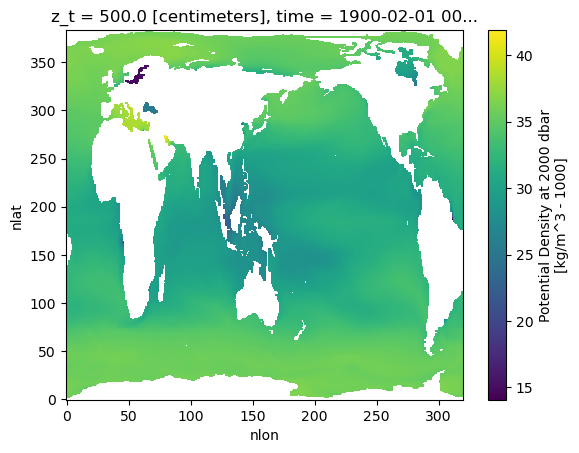

In [8]:
dens2_data.isel(time=0,z_t=0).plot()

# Find missing files

In [1]:
import os
import glob

In [5]:
temp_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP'
salt_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT'
dens_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/DENS2'

In [6]:
# Get list of TEMP files
temp_files = sorted(glob.glob(os.path.join(temp_dir, '*.nc')))

# Generate corresponding DENS2 filenames
missing_files = []
for temp_file in temp_files:
    temp_filename = os.path.basename(temp_file)
    dens_filename = temp_filename.replace('TEMP', 'DENS2')
    dens_filepath = os.path.join(dens_dir, dens_filename)
    
    # Check if the corresponding DENS2 file exists
    if not os.path.exists(dens_filepath):
        missing_files.append(dens_filename)

# Print missing files
if missing_files:
    print("Missing DENS2 files:")
    for missing_file in missing_files:
        print(missing_file)
else:
    print("No missing DENS2 files.")

Missing DENS2 files:
b.e21.BSSP370smbb.f09_g17.LE2-1231.019.pop.h.DENS2.206501-207412.nc


# test parallel

In [8]:
missing_files = []
for temp_file in temp_files:
    temp_filename = os.path.basename(temp_file)
    dens_filename = temp_filename.replace('TEMP', 'DENS2')
    dens_filepath = os.path.join(dens_dir, dens_filename)
    
    if not os.path.exists(dens_filepath):
        salt_filename = temp_filename.replace('TEMP', 'SALT')
        missing_files.append((temp_file, salt_filename))

In [9]:
# Function to process a single file
def process_file(temp_file, salt_file, dens_filename):
    print(temp_file, salt_file, dens_filename)
    return

In [10]:
tasks = [delayed(process_file)(temp_file, salt_file, dens_filename) for temp_file, salt_file in missing_files]
# Compute the tasks in parallel
dask.compute(*tasks)

NameError: name 'delayed' is not defined

# test current code

In [19]:
import time
import psutil
import os
import glob
import xarray as xr
import gsw
import dask
from dask import delayed

start_time = time.time()

temp_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP'
salt_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT'
dens_dir = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/DENS2'

# Function to calculate dens2
def calculate_dens2(temp_file, salt_file):
    print('start computaton')
    ds_temp = xr.open_dataset(temp_file, chunks={'time': -1})
    print('ds_temp open')
    ds_salt = xr.open_dataset(salt_file, chunks={'time': -1})
    print('ds_salt open')
    
    CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
    print('CT computed')
    sigma2 = gsw.density.sigma2(ds_salt['SALT'], CT)
    sigma2 = sigma2.rename('SIGMA_2')
    print('sigma2 computed')
          
    ds_temp.close()
    ds_salt.close()
    
    return sigma2

# Function to process a single file
def process_file(temp_file, salt_file, dens_filename):
    try:
        # Calculate dens2
        dens2_data = calculate_dens2(temp_file, salt_file)
        print('dens2_data here')

        dens2_data = dens2_data.astype('float32')
        dens2_data.attrs['units'] = 'kg/m^3 - 1000'
        dens2_data.attrs['long_name'] = 'Potential Density at 2000 dbar'
        print('dens2 attributes fixed')
        
        # Save the result to the output directory
        output_file = os.path.join(dens_dir, dens_filename)
        dens2_data.to_netcdf(output_file)
        
        print(f'{dens_filename[25:]}  -  complete')
        
    except Exception as e:
        print(f'Error processing {dens_filename[26:]}')

# Get list of TEMP and SALT files
temp_files = sorted(glob.glob(os.path.join(temp_dir, '*.nc')))
salt_files = sorted(glob.glob(os.path.join(salt_dir, '*.nc')))

In [25]:
# Identify missing DENS2 files
missing_files = []
for temp_file, salt_file in zip(temp_files, salt_files):
    temp_filename = os.path.basename(temp_file)
    dens_filename = temp_filename.replace('TEMP', 'DENS2')
    dens_filepath = os.path.join(dens_dir, dens_filename)
    
    if not os.path.exists(dens_filepath):
        missing_files.append((temp_file, salt_file, dens_filename))

In [21]:
missing_files[0]

('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.TEMP.195001-195912.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.SALT.195001-195912.nc',
 'b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.DENS2.195001-195912.nc')

In [26]:
missing_files[0]

('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.TEMP.196001-196912.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.SALT.196001-196912.nc',
 'b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.DENS2.196001-196912.nc')

In [27]:
for temp_file, salt_file, dens_filename in missing_files:
    print(temp_file, salt_file, dens_filename)
    break

/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.TEMP.196001-196912.nc /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT/b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.SALT.196001-196912.nc b.e21.BHISTsmbb.f09_g17.LE2-1231.011.pop.h.DENS2.196001-196912.nc


In [28]:
#dens2_data = calculate_dens2(temp_file, salt_file)

In [29]:
process_file(temp_file, salt_file, dens_filename)

start computaton
ds_temp open
ds_salt open
CT computed
sigma2 computed
dens2_data here
dens2 attributes fixed


/home/innag3580/.conda/envs/movie/lib/python3.10/site-packages/xarray/coding/variables.py:221: RuntimeWarning: overflow encountered in multiply
  data *= scale_factor
/home/innag3580/.conda/envs/movie/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sigma2
  return func(*(_execute_task(a, cache) for a in args))


E2-1231.011.pop.h.DENS2.196001-196912.nc  -  complete


# check output

In [7]:
import xarray as xr
import matplotlib.pyplot as plt


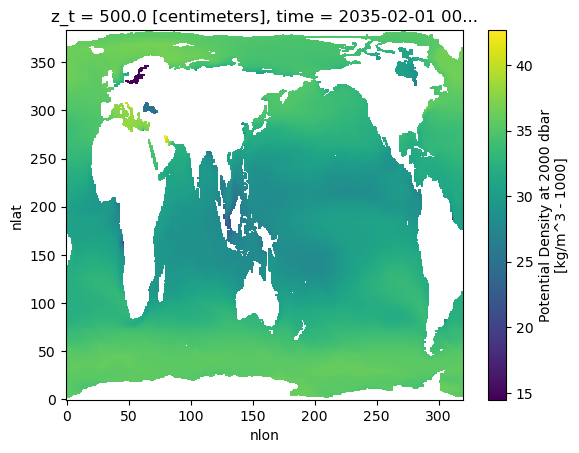

In [8]:
file_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/DENS2/b.e21.BSSP370smbb.f09_g17.LE2-1301.020.pop.h.DENS2.203501-204412.nc'
da = xr.open_dataarray(file_path)
da.isel(time=0, z_t=0).plot()